### Este código Python genera un conjunto de datos simulado de 30 casos judiciales con fines de prueba o análisis.

In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta

# Configuración de la Faker para Argentina
fake = Faker('es_AR')

num_casos = 30

# Generar fechas de inicio
fechas_inicio = [fake.date_between(start_date='-5y', end_date='today') for _ in range(num_casos)]
fechas_inicio_datetime = pd.to_datetime(fechas_inicio)

# Generar fechas de último movimiento asegurando que sean mayores o iguales a la fecha de inicio
fechas_ultimo_movimiento_datetime = []
for fecha_inicio in fechas_inicio_datetime:
    fecha_ultimo_movimiento = fake.date_time_between(start_date=fecha_inicio, end_date='now')  # Usa datetime
    fechas_ultimo_movimiento_datetime.append(fecha_ultimo_movimiento)

data = {
    'ID_Caso': range(1, num_casos + 1),
    'Fecha_Inicio': fechas_inicio_datetime,
    'Tipo_Causa': [random.choice(['Civil', 'Penal', 'Laboral', 'Comercial']) for _ in range(num_casos)],
    'Estado_Actual': [random.choice(['En Curso', 'Pendiente de Juicio', 'Apelación', 'Ejecución']) for _ in range(num_casos)],
    'Juzgado': [f"Juzgado {random.randint(1, 20)} de {fake.city()}" for _ in range(num_casos)],
    'Partes': [f"{fake.name()} vs. {fake.name()}" for _ in range(num_casos)],
    'Materia': [random.choice(['Daños y Perjuicios', 'Robo', 'Despido', 'Quiebra']) for _ in range(num_casos)],
    'Fecha_Ultima_Movimiento': fechas_ultimo_movimiento_datetime,
    'Tiempo_Proceso_Dias': [0] * num_casos,  # Inicializar, se calculará luego
    'Fallo': [random.choice(['Favorable', 'Desfavorable', 'Conciliación', 'Sin Definir']) for _ in range(num_casos)],
    'Instancia': [random.choice(['Primera Instancia', 'Cámara de Apelaciones', 'Corte Suprema']) for _ in range(num_casos)],
    'Tiene_Recurso': [random.choice(['Sí', 'No']) for _ in range(num_casos)],
    'Documentos_Adjuntos': np.random.randint(0, 50, num_casos),
}

df = pd.DataFrame(data)


# Modificar 'Materia' si 'Tipo_Causa' es 'Penal'
def modificar_materia(df):
    for index, row in df.iterrows():
        if row['Tipo_Causa'] == 'Penal':
            materias = ['Daños y Perjuicios', 'Robo', 'Despido', 'Quiebra', 'Corrupción']
            df.loc[index, 'Materia'] = random.choice(materias)
    return df


df = modificar_materia(df.copy()) # Aplicar la modificación al DataFrame

# Calcular Tiempo_Proceso_Dias correctamente
df['Tiempo_Proceso_Dias'] = (df['Fecha_Ultima_Movimiento'] - df['Fecha_Inicio']).dt.days

nombre_archivo_csv = 'df_casos_judiciales.csv'
df.to_csv(nombre_archivo_csv, index=False)

print(f"El DataFrame se ha guardado exitosamente en el archivo '{nombre_archivo_csv}'")
df

El DataFrame se ha guardado exitosamente en el archivo 'df_casos_judiciales.csv'


,ID_Caso,Fecha_Inicio,Tipo_Causa,Estado_Actual,Juzgado,Partes,Materia,Fecha_Ultima_Movimiento,Tiempo_Proceso_Dias,Fallo,Instancia,Tiene_Recurso,Documentos_Adjuntos
0,1,2025-03-02,Penal,Ejecución,Juzgado 7 de Mendoza,Alma Maria Paz Medina vs. Lautaro Martina Sanchez,Quiebra,2025-05-12 19:06:53.279696,71,Conciliación,Cámara de Apelaciones,No,13
1,2,2022-07-24,Penal,En Curso,Juzgado 8 de San Juan,Catalina Gomez Olivera vs. Sr(a). Valentina Ja...,Robo,2025-05-08 03:48:51.087029,1019,Conciliación,Primera Instancia,Sí,10
2,3,2022-07-17,Penal,Ejecución,Juzgado 6 de Resistencia,Abigail Cardozo Gonzalez vs. Thiago Emanuel Ayala,Daños y Perjuicios,2025-04-26 03:35:14.142360,1014,Favorable,Corte Suprema,No,45
3,4,2022-10-28,Civil,Apelación,Juzgado 17 de Mar del Plata,Sr(a). Sofia Belen Paez vs. Micaela Rodriguez,Robo,2023-10-07 16:45:58.305386,344,Sin Definir,Cámara de Apelaciones,No,36
4,5,2021-05-24,Civil,Ejecución,Juzgado 10 de Merlo,Maria Paz Thiago Muñoz vs. Dr(a). Alma Romero,Robo,2021-09-23 00:19:39.833420,122,Conciliación,Primera Instancia,Sí,11
5,6,2024-11-30,Comercial,Ejecución,Juzgado 16 de Bahía Blanca,Camila Gomez Ramos vs. Valentino Lola Aguirre,Quiebra,2025-06-17 16:10:56.956258,199,Sin Definir,Primera Instancia,Sí,48
6,7,2025-10-17,Laboral,Ejecución,Juzgado 3 de Mar del Plata,Renata Valentino Ledesma vs. Josefina Lara Torres,Daños y Perjuicios,2025-11-21 15:36:26.156493,35,Favorable,Corte Suprema,Sí,17
7,8,2025-02-23,Civil,Pendiente de Juicio,Juzgado 13 de Ushuaia,Emilia Diaz vs. Josefina Duarte Lopez,Daños y Perjuicios,2025-03-28 13:35:25.162300,33,Favorable,Cámara de Apelaciones,Sí,42
8,9,2025-12-02,Comercial,En Curso,Juzgado 18 de Corrientes,Santino Rodriguez vs. Victoria Tiziano Valenti...,Robo,2025-12-08 20:18:51.517982,6,Desfavorable,Cámara de Apelaciones,No,27
9,10,2021-04-10,Laboral,En Curso,Juzgado 19 de Constitución,Sr(a). Tomas Rios vs. Paula Sanchez Garcia,Robo,2024-09-11 01:18:04.919665,1250,Sin Definir,Corte Suprema,Sí,17


### Este código Python realiza un análisis estadístico y exploratorio detallado sobre un conjunto de datos simulado de casos judiciales cargado desde un archivo CSV.


Análisis de Casos Judiciales:
----------------------------------------

Número total de casos: 30

1. Análisis del Tiempo de Proceso:
Tiempo promedio de proceso (días): 555.87
Tiempo mínimo de proceso (días): 6
Tiempo máximo de proceso (días): 1387

Distribución del Tiempo de Proceso:


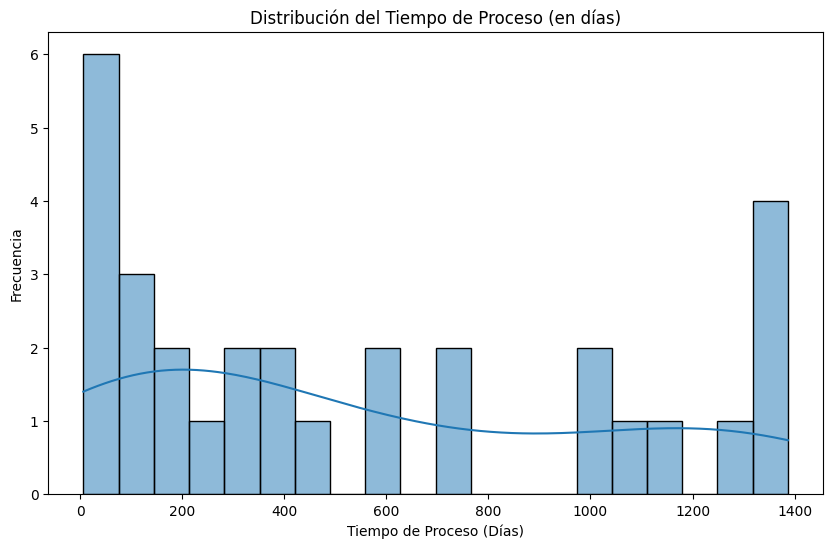


2. Análisis de Fallos:

Distribución de los Fallos:
Fallo
Sin Definir     10
Favorable        8
Desfavorable     7
Conciliación     5
Name: count, dtype: int64


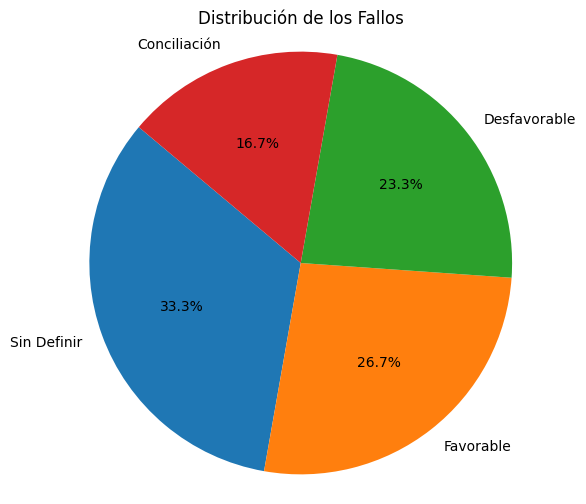


3. Tiempo de Proceso por Tipo de Causa:

Tiempo promedio de proceso por tipo de causa (días):
Tipo_Causa
Laboral      831.571429
Penal        601.833333
Comercial    563.333333
Civil        351.272727
Name: Tiempo_Proceso_Dias, dtype: float64


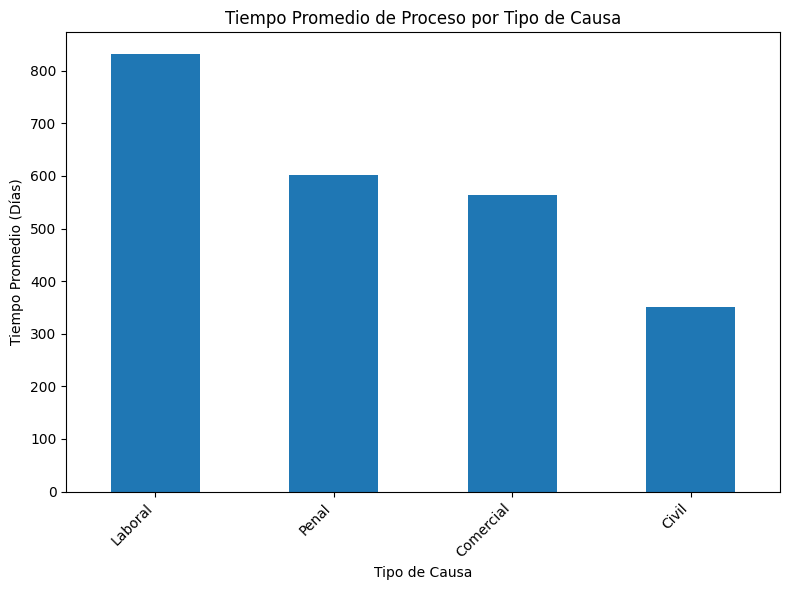


4. Fallos por Tipo de Causa:

Distribución de los Fallos por Tipo de Causa:
Fallo       Conciliación  Desfavorable  Favorable  Sin Definir
Tipo_Causa                                                    
Civil                  2             2          4            3
Comercial              0             3          2            1
Laboral                0             2          1            4
Penal                  3             0          1            2


<Figure size 1000x600 with 0 Axes>

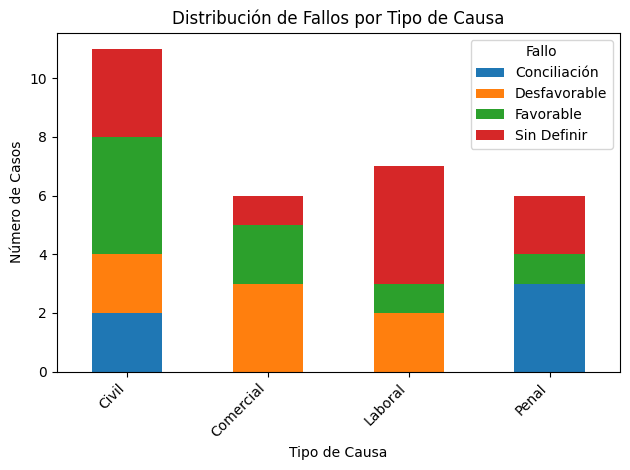


5. Tiempo de Proceso por Estado Actual:

Tiempo promedio de proceso por estado actual (días):
Estado_Actual
En Curso               747.300000
Apelación              620.250000
Pendiente de Juicio    573.333333
Ejecución              328.200000
Name: Tiempo_Proceso_Dias, dtype: float64


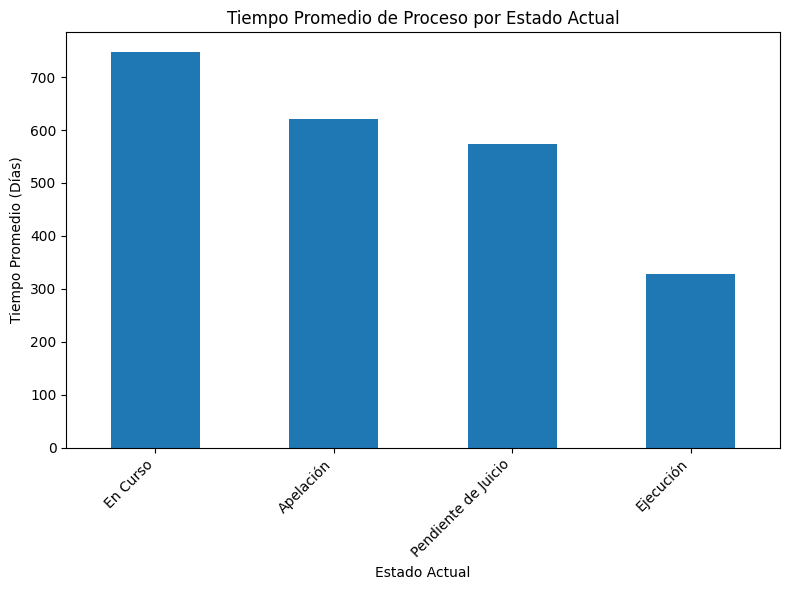


6. Fallos por Instancia:

Distribución de los Fallos por Instancia:
Fallo                  Conciliación  Desfavorable  Favorable  Sin Definir
Instancia                                                                
Corte Suprema                     0             2          5            6
Cámara de Apelaciones             1             2          2            2
Primera Instancia                 4             3          1            2


<Figure size 800x600 with 0 Axes>

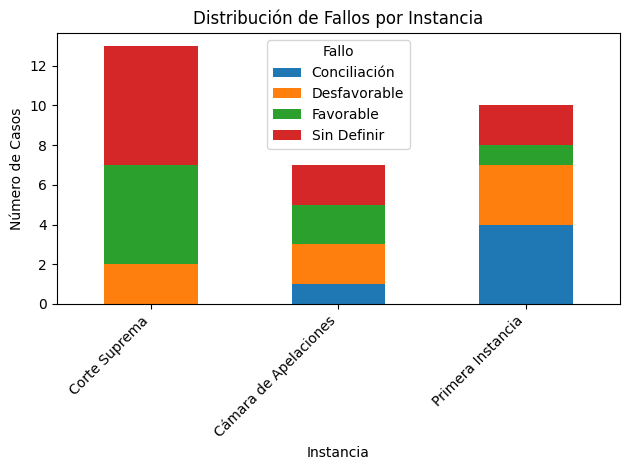

In [3]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


nombre_archivo_csv = 'df_casos_judiciales.csv'

data_casos = pd.read_csv(nombre_archivo_csv)
df_casos = pd.DataFrame(data_casos)


def analizar_justicia(df_casos):
    """Analiza los datos de casos judiciales."""
    print("\nAnálisis de Casos Judiciales:")
    print("-" * 40)

    print(f"\nNúmero total de casos: {len(df_casos)}")

    # 1. Tiempo de Proceso
    print("\n1. Análisis del Tiempo de Proceso:")
    print(f"Tiempo promedio de proceso (días): {df_casos['Tiempo_Proceso_Dias'].mean():.2f}")
    print(f"Tiempo mínimo de proceso (días): {df_casos['Tiempo_Proceso_Dias'].min()}")
    print(f"Tiempo máximo de proceso (días): {df_casos['Tiempo_Proceso_Dias'].max()}")
    print("\nDistribución del Tiempo de Proceso:")
    plt.figure(figsize=(10, 6))
    sns.histplot(df_casos['Tiempo_Proceso_Dias'], bins=20, kde=True)
    plt.title('Distribución del Tiempo de Proceso (en días)')
    plt.xlabel('Tiempo de Proceso (Días)')
    plt.ylabel('Frecuencia')
    plt.show()

    # 2. Análisis de Fallos
    print("\n2. Análisis de Fallos:")
    fallos_counts = df_casos['Fallo'].value_counts()
    print("\nDistribución de los Fallos:")
    print(fallos_counts)
    plt.figure(figsize=(6, 6))
    plt.pie(fallos_counts, labels=fallos_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribución de los Fallos')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    # 3. Tiempo de Proceso por Tipo de Causa
    print("\n3. Tiempo de Proceso por Tipo de Causa:")
    tiempo_por_causa = df_casos.groupby('Tipo_Causa')['Tiempo_Proceso_Dias'].mean().sort_values(ascending=False)
    print("\nTiempo promedio de proceso por tipo de causa (días):")
    print(tiempo_por_causa)
    plt.figure(figsize=(8, 6))
    tiempo_por_causa.plot(kind='bar')
    plt.title('Tiempo Promedio de Proceso por Tipo de Causa')
    plt.ylabel('Tiempo Promedio (Días)')
    plt.xlabel('Tipo de Causa')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 4. Fallos por Tipo de Causa
    print("\n4. Fallos por Tipo de Causa:")
    fallos_por_causa = df_casos.groupby(['Tipo_Causa', 'Fallo']).size().unstack(fill_value=0)
    print("\nDistribución de los Fallos por Tipo de Causa:")
    print(fallos_por_causa)
    plt.figure(figsize=(10, 6))
    fallos_por_causa.plot(kind='bar', stacked=True)
    plt.title('Distribución de Fallos por Tipo de Causa')
    plt.ylabel('Número de Casos')
    plt.xlabel('Tipo de Causa')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 5. Tiempo de Proceso por Estado Actual
    print("\n5. Tiempo de Proceso por Estado Actual:")
    tiempo_por_estado = df_casos.groupby('Estado_Actual')['Tiempo_Proceso_Dias'].mean().sort_values(ascending=False)
    print("\nTiempo promedio de proceso por estado actual (días):")
    print(tiempo_por_estado)
    plt.figure(figsize=(8, 6))
    tiempo_por_estado.plot(kind='bar')
    plt.title('Tiempo Promedio de Proceso por Estado Actual')
    plt.ylabel('Tiempo Promedio (Días)')
    plt.xlabel('Estado Actual')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 6. Fallos por Instancia
    print("\n6. Fallos por Instancia:")
    fallos_por_instancia = df_casos.groupby(['Instancia', 'Fallo']).size().unstack(fill_value=0)
    print("\nDistribución de los Fallos por Instancia:")
    print(fallos_por_instancia)
    plt.figure(figsize=(8, 6))
    fallos_por_instancia.plot(kind='bar', stacked=True)
    plt.title('Distribución de Fallos por Instancia')
    plt.ylabel('Número de Casos')
    plt.xlabel('Instancia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Llamada a la función
analizar_justicia(df_casos)